# PART - 1  
## Low dimensional dataset

In [10]:
# working directory
import os
print('Current working directory : ', os.getcwd())
print('List of files in working directory  : ', os.listdir())

Current working directory :  C:\Users\Santosh Sharma\Desktop\coursera-machine-learning-stanford\Anomaly-Detection
List of files in working directory  :  ['.ipynb_checkpoints', 'Anomaly Detection Algorithm.ipynb', 'ex8data1.mat', 'ex8data2.mat']


In [2]:
# Import libraries
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Estimating parameters for a Gaussian
def Gaussian_Parameters(X):
    # initialize value
    m,n = X.shape
    
    # return
    mu = np.zeros(shape = (n,1))
    sigma2 =  np.zeros(shape = (n,1))
    
    # compute mean and variance
    for col in range(n):
        avg = X[:,col].mean()
        var = X[:,col].var()
        mu[col] = avg
        sigma2[col] = var
        
    return mu, sigma2

In [4]:
# Gaussian distribution
def Gaussian_Distribution(X,mu,sigma2):
    # return
    px = np.zeros(shape = (X.shape[0], 1))
    
    #compute px
    v = np.zeros(shape = X.shape)
    for i in range(X.shape[1]):
        v[:,i] = 1/(np.sqrt(2*np.pi*sigma2[i,:])) * np.exp(-((X[:,i] - mu[i,:])**2) / (2 * sigma2[i,:]))
    
    px = v[:,0] * v[:,1]
    return px
    

In [5]:
def Multivariate_Gaussian(X,mu,sigma2):
    
    # Initialize values
    m,n = X.shape
    
    # return
    #px = np.zeros(shape = (X.shape[0], 1))
    
     #
    if(sigma2.shape[1] == 1) or (sigma2.shape[0] == 1):
        Sigma2 = np.diagflat(sigma2)
    
    # determinant of Sigma2
    det_mat = np.linalg.det(Sigma2)
    
    # inverse of cov_matrix
    inv_sigma2 = np.linalg.inv(Sigma2)

    X = (X - mu.T)
    px = 1/((2*np.pi)**(n/2) * (det_mat**0.5)) * np.exp(-0.5 * (X * X).dot(inv_sigma2).sum(axis = 1))
    
    return px

In [6]:
# Selecting the threshold
def Select_Threshold(yval, pval):
    # intialize value
    F1 = 0
    
    # return
    bestF1 = 0
    bestEpsilon = 0
    
    # stepsize for epsilon
    stepsize = (pval.max() - pval.min()) / 1000
   
    # main loop
    for epsilon in np.arange(pval.min(),pval.max(),stepsize):
        # reset tp,fp,fn to 0
        Tp = 0
        Fp = 0
        Fn = 0
        # make prediction
        prediction = (pval < epsilon)
        # inner loop for tp,fp,fn
        for i in range(len(prediction)):
            if prediction[i] == 1 and yval[i] == 1:
                Tp += 1
            elif prediction[i] == 1 and yval[i] == 0:
                Fp += 1
            elif prediction[i] == 0 and yval[i] == 1:
                Fn += 1
         # Zero division error handling   
            try:
                pre = Tp/(Tp + Fp)
                rec = Tp/(Tp + Fn)
                F1 = 2 * ((pre * rec) / (pre + rec))
            except ZeroDivisionError:
                pre = 0
                rec = 0
            
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon
                    
    return bestF1, bestEpsilon 

In [7]:
# Visulaize data
def visualize_fit(X, outlier, display_outlier = False):
    val = np.arange(0,35.5,0.5)
    X1,X2 = np.meshgrid(val,val)
    tx1 = X1.reshape(X1.size, order = 'F').reshape(X1.shape[1]*X1.shape[1],1)
    tx2 = X2.reshape(X2.size, order = 'F').reshape(X2.shape[1]*X2.shape[1],1)
    tmp = np.concatenate((tx1,tx2), axis = 1)
    Z = Gaussian_Distribution(tmp,mu,sigma2)
    zz = Z.reshape(X1.shape[0],X1.shape[1])
    #plt.figure(figsize = (8,6))
    if display_outlier:
        plt.scatter(X[:,0], X[:,1], marker = 'x', s = 30, c='b', alpha = 0.5)
        plt.scatter(X[:,0][outlier == 1], X[:,1][outlier == 1], s = 90, facecolors='none', edgecolors='r')
    else:
        plt.scatter(X[:,0], X[:,1], marker = 'x', s = 30, c='b', alpha = 0.5)
    plt.xlabel('Latency (ms)')
    plt.ylabel('Throughput (mb/s)')
    if (np.sum(np.isinf(zz)) == 0):
        plt.contour(X1,X2,zz,5.**(np.arange(-20,0,4)).T)

Shape of train data : (307, 2)
Shape of validation data : (307, 2)
Best epsilon found using cross-validation: 8.990852779269492e-05
Best F1 on cross-validation set: 0.8750000000000001
Total outliers found : 6
**************************************************


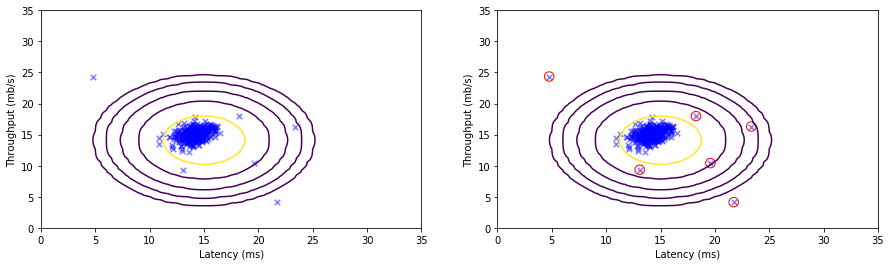

In [8]:
# Run the Program
# Load Example Dataset
# Read data
dict = loadmat('ex8data1.mat')

# Train data
X = dict['X']

# Validation data
Xval = dict['Xval']
yval = dict['yval']

# print shape of train and validation data
print('Shape of train data : {}'.format(X.shape))
print('Shape of validation data : {}'.format(Xval.shape))# Read data

# Estimate datasets statistics(mean and variance)
mu, sigma2 = Gaussian_Parameters(X)

# Gaussian for train data
train_px = Gaussian_Distribution(X,mu,sigma2) 

# Find good epsilon threshold using a cross-validation set
pval = Gaussian_Distribution(Xval, mu, sigma2)
bestF1,bestEpsilon = Select_Threshold(yval, pval)
print('Best epsilon found using cross-validation: {}'.format(bestEpsilon))
print('Best F1 on cross-validation set: {}'.format(bestF1))


# Find the outliers in the training set and plot
outliers = (train_px < bestEpsilon)

# Print total outliers
print('Total outliers found : {}'.format(np.sum(outliers == 1)))
print('*'*50)

# Visulaize the fit
# Draw a red circle around those outliers
plt.figure(figsize=(15,4))
# Plot without outliers
plt.subplot(1,2,1)
visualize_fit(X,outliers,False) 

# Plot with outliers
plt.subplot(1,2,2)
visualize_fit(X,outliers,True) 

# PART - 2
##  High dimensional dataset( Multidimensional Outliers)

In [9]:
# load data
data = loadmat('ex8data2.mat')

# Train data
X = data['X']

# Validation data
Xval = data['Xval']
yval = data['yval']

# Print shape of train and validation data
print('Shape of train data : {}'.format(X.shape))
print('Shape of validation data : {}'.format(Xval.shape))

# Estimate dataset statistics(mean, variance)
mu, sigma2 = Gaussian_Parameters(X)

# Training set
train_px = Multivariate_Gaussian(X, mu, sigma2)

# Validation set
pval = Multivariate_Gaussian(Xval, mu, sigma2)

# Find the best Threshold
best_F1, best_epsilon = Select_Threshold(yval, pval)
print('Best epsilon found using cross-validation: {}'.format(best_epsilon))
print('Best F1 score on cross-validation set: {}'.format(best_F1))

# Find outliers in train set using best threshold
outliers = (train_px < best_epsilon)
total_out = np.sum(outliers == 1)

# Print total number of outliers present in train set
print('Total outliers found : {}'.format(total_out))

Shape of train data : (1000, 11)
Shape of validation data : (100, 11)
Best epsilon found using cross-validation: 1.377228890761358e-18
Best F1 score on cross-validation set: 0.6153846153846154
Total outliers found : 117
